# DGA ALgorithm Detection using Transformer

This dataset has been collected from Alexa website ranking a blacklist of previous DGA domain names both sources are avaiblable within the provenance section.
The purpose is to build a classifier which can help us detect a potential machine infected by the DGA (Domain Generation Algorithm) malware.

In [1]:
import shutil

# Check total, used, and free space on the root directory
total, used, free = shutil.disk_usage("/")

print("Total Disk Space: {:.2f} GB".format(total / (1024**3)))
print("Used Disk Space: {:.2f} GB".format(used / (1024**3)))
print("Free Disk Space: {:.2f} GB".format(free / (1024**3)))

Total Disk Space: 134.99 GB
Used Disk Space: 93.40 GB
Free Disk Space: 41.59 GB


## 0. Importing + Dependencies

In [2]:
# pip install numpy==1.26.4

In [3]:
# pip install pandas==2.2.2

In [4]:
# !pip uninstall allennlp allennlp-models --yes

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

## 1. Dataset: [DGA Domain Names](https://raw.githubusercontent.com/osunjio/applied_data_science_sidi/78e6da047845d071667bb887e28a5c120c8e6a12/data/dga_data_full.csv)

In [6]:
!wget https://raw.githubusercontent.com/osunjio/applied_data_science_sidi/78e6da047845d071667bb887e28a5c120c8e6a12/data/dga_data_full.csv

--2024-11-02 07:28:53--  https://raw.githubusercontent.com/osunjio/applied_data_science_sidi/78e6da047845d071667bb887e28a5c120c8e6a12/data/dga_data_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7339716 (7.0M) [text/plain]
Saving to: ‘dga_data_full.csv.9’

100%[======================================>] 7,339,716   --.-K/s   in 0.02s   

2024-11-02 07:28:53 (314 MB/s) - ‘dga_data_full.csv.9’ saved [7339716/7339716]



In [7]:
df = pd.read_csv('dga_data_full.csv')
df.head(50)

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
5,dga,takenroll,takenroll.net,nivdort
6,dga,vrrtneoswsds,vrrtneoswsds.ru,cryptolocker
7,dga,mzapiwbcsbqiyxnlxa1hprx8n,mzapiwbcsbqiyxnlxa1hprx8n.com,newgoz
8,dga,xkoihiygtanuio,xkoihiygtanuio.ru,cryptolocker
9,dga,dreamdont,dreamdont.net,nivdort


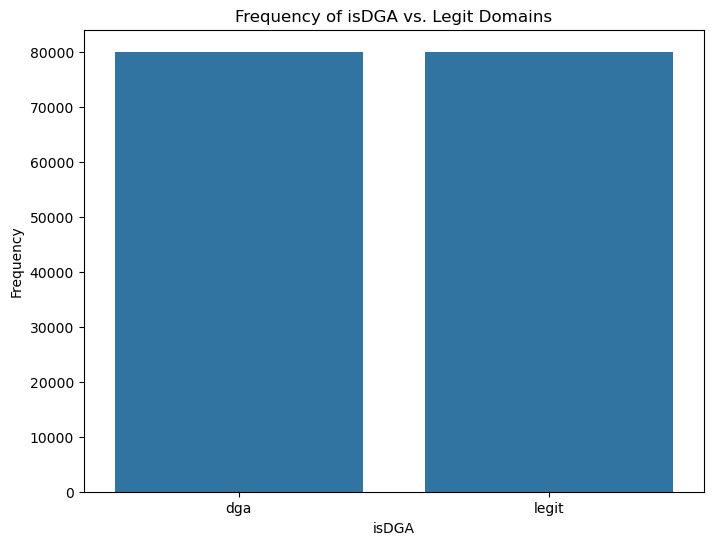

In [8]:
# prompt: visualize isDGA vs legit frequency

# Calculate the frequency of isDGA vs legit
dga_frequency = df['isDGA'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=dga_frequency.index, y=dga_frequency.values)
plt.title('Frequency of isDGA vs. Legit Domains')
plt.xlabel('isDGA')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

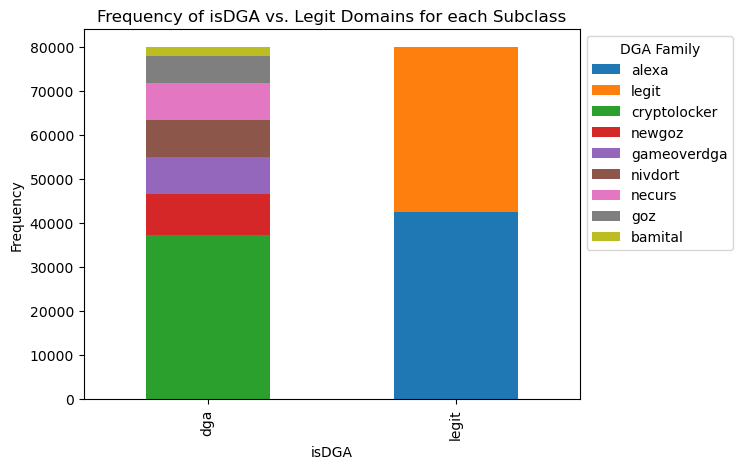

In [9]:
# prompt: visualize dga vs legit with each subclass as a legend in it, stacked please and sorted

# Calculate the frequency of isDGA vs legit for each subclass
dga_subclass_frequency = df.groupby(['isDGA', 'subclass'])['domain'].count().unstack()

# Sort the subclasses by frequency in descending order
dga_subclass_frequency = dga_subclass_frequency.reindex(dga_subclass_frequency.sum().sort_values(ascending=False).index, axis=1)


# Create a stacked bar plot
plt.figure(figsize=(12, 6))
dga_subclass_frequency.plot(kind='bar', stacked=True)
plt.title('Frequency of isDGA vs. Legit Domains for each Subclass')
plt.xlabel('isDGA')
plt.ylabel('Frequency')
plt.legend(title='DGA Family', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [10]:
# for rows where isDGA is legit and subclass is not legit
df[(df['isDGA'] == 'legit') & (df['subclass'] != 'legit')]

,isDGA,domain,host,subclass
80002,legit,clutchfans,clutchfans.net,alexa
80005,legit,marykayintouch,marykayintouch.com,alexa
80006,legit,droid,droid-life.com,alexa
80007,legit,polimi,polimi.it,alexa
80010,legit,goair,goair.in,alexa
...,...,...,...,...
159993,legit,paydollar,paydollar.com,alexa
159994,legit,travelpulse,travelpulse.com,alexa
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa


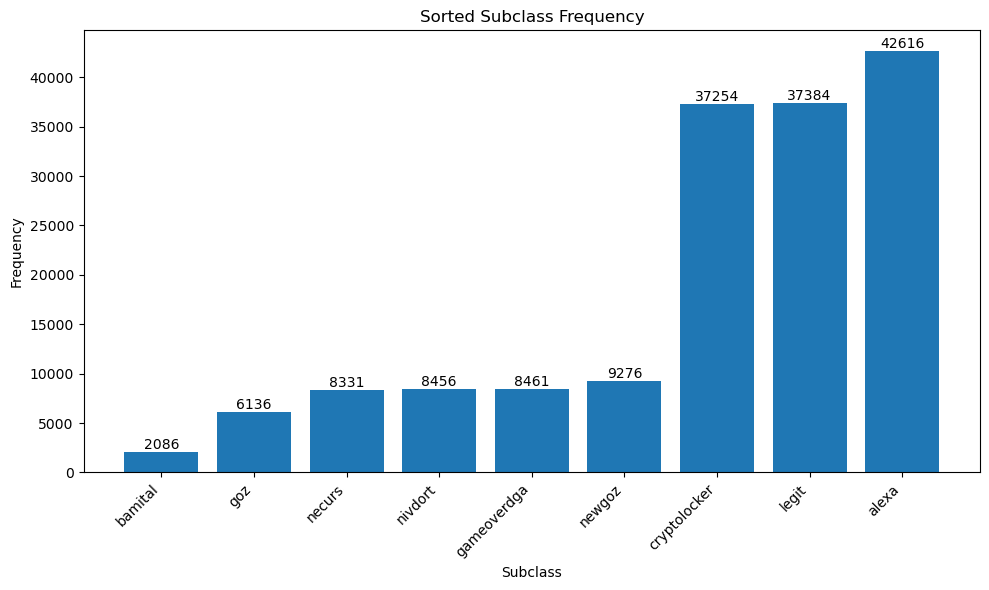

In [11]:
# prompt: visualize the sorted subclass frequency of df using vertical barchart with each frequency on the bar with 3 significant figures

# Assuming 'df' is your DataFrame and you have a column named 'subclass'
subclass_counts = df['subclass'].value_counts().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subclass_counts.index, subclass_counts.values)

# Add frequency labels to the bars with 3 significant figures
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Subclass')
plt.ylabel('Frequency')
plt.title('Sorted Subclass Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
df[df["isDGA"]=="dga"]["subclass"].unique().tolist()

['gameoverdga',
 'cryptolocker',
 'newgoz',
 'nivdort',
 'goz',
 'necurs',
 'bamital']

In [13]:
# prompt: simplify df to just column domain and subclass

# Keep only the 'domain' and 'subclass' columns
sliced_df = df[['domain','host', 'subclass']]

sliced_df

,domain,host,subclass
0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...
159995,manhunt,manhunt.net,alexa
159996,yupptv,yupptv.com,alexa
159997,bbcmundo,bbcmundo.com,legit
159998,kanogames,kanogames.com,legit


In [14]:
original_df = sliced_df.copy()

In [15]:
original_df['host'] = original_df['host'].fillna('')
original_df['domain'] = original_df['domain'].fillna('')

sliced_df['domain'] = sliced_df['domain'].fillna('')

/tmp/ipykernel_10840/2022476595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['domain'] = sliced_df['domain'].fillna('')


In [16]:
!pip install tldextract

In [17]:
import tldextract

# Sample DataFrame
# Extract TLD
sliced_df['tld'] = sliced_df['host'].apply(lambda x: tldextract.extract(x).suffix)

print(sliced_df)

                            domain                            host  \
0       6xzxsw3sokvg1tc752y1a6p0af  6xzxsw3sokvg1tc752y1a6p0af.com   
1                   glbtlxwwhbnpxs               glbtlxwwhbnpxs.ru   
2                   xxmamopyipbfpk               xxmamopyipbfpk.ru   
3        zfd5szpi18i85wj9uy13l69rg   zfd5szpi18i85wj9uy13l69rg.net   
4                     jpqftymiuver                 jpqftymiuver.ru   
...                            ...                             ...   
159995                     manhunt                     manhunt.net   
159996                      yupptv                      yupptv.com   
159997                    bbcmundo                    bbcmundo.com   
159998                   kanogames                   kanogames.com   
159999                   roadrover                    roadrover.cn   

            subclass  tld  
0        gameoverdga  com  
1       cryptolocker   ru  
2       cryptolocker   ru  
3             newgoz  net  
4       cryptolocke

### Data Augmentation

As seen from the subclass frequency, 6 of the 7 DGA subclasses are massively underrepresented. And since imbalanced dataset also hurts our model's learning

In [18]:
tld_to_append = {}

for subclass in sliced_df['subclass'].unique(): 
    curr_tld = sliced_df[sliced_df['subclass']== subclass]['tld'].unique().tolist()
    tld_to_append[subclass] = curr_tld
sliced_df = sliced_df.drop('tld', axis=1)

In [19]:
# prompt: display one example from each subclass in ['gameoverdga',
#  'cryptolocker',
#  'newgoz',
#  'nivdort',
#  'goz',
#  'necurs',
#  'bamital']

target_subclasses = ['gameoverdga', 'cryptolocker', 'newgoz', 'nivdort', 'goz', 'necurs', 'bamital']

for subclass in target_subclasses:
  example_domain = sliced_df[sliced_df['subclass'] == subclass]['host'].iloc[0]
  print(f"Subclass: {subclass}, Example host: {example_domain}")

Subclass: gameoverdga, Example host: 6xzxsw3sokvg1tc752y1a6p0af.com
Subclass: cryptolocker, Example host: glbtlxwwhbnpxs.ru
Subclass: newgoz, Example host: zfd5szpi18i85wj9uy13l69rg.net
Subclass: nivdort, Example host: takenroll.net
Subclass: goz, Example host: rcdqeqmpxgdiuqombhuwcfu.ru
Subclass: necurs, Example host: sfmbdpnijlarq.cc
Subclass: bamital, Example host: 5df9d44072820ad6eaac91669f357fea.org


If we look at the examples of the subclasses above, we chose to do the following possible actions for all the subclasses except **nivdort**:
* swap_character()
* insert_character()
* delete_character()
* substitute_character()

The spirit of this is similar to BART's pretraining methodology: sentence-corruption.

In [20]:
import random
import string

# Higher probabilities for more aggressive augmentations
augment_probs = {
    'swap': 0.4,
    'insert': 0.35,
    'delete': 0.3,
    'substitute': 0.25,
}

# Function to forcefully apply augmentations aggressively
def data_augment(domain, num_augmentations, tld_to_append):
    augmented_domains = set()

    while len(augmented_domains) < num_augmentations:
        augmented_domain = domain
        applied = False  # Track if any augmentation is applied

        # Loop through augmentations and apply each based on probability
        for _ in range(2):  # Apply 2 augmentations per call
            if random.random() < augment_probs['swap']:
                augmented_domain = swap_characters(augmented_domain)
                applied = True

            if random.random() < augment_probs['insert']:
                augmented_domain = insert_character(augmented_domain)
                applied = True

            if random.random() < augment_probs['delete']:
                augmented_domain = delete_character(augmented_domain)
                applied = True

            if random.random() < augment_probs['substitute']:
                augmented_domain = substitute_character(augmented_domain)
                applied = True

        # Ensure at least one augmentation is applied
        random_tld = random.choice(tld_to_append)
        augmented_domain_with_tld = f"{augmented_domain}.{random_tld}"
        
        augmented_domains.add((augmented_domain, augmented_domain_with_tld))
        # Add to set of unique augmented domains
    return list(augmented_domains)

# Define forced augmentation to ensure at least one augmentation
def force_random_augmentation(domain):
    aug_type = random.choice(['swap', 'insert', 'delete', 'substitute'])
    if aug_type == 'swap':
        return swap_characters(domain)
    elif aug_type == 'insert':
        return insert_character(domain)
    elif aug_type == 'delete':
        return delete_character(domain)
    elif aug_type == 'substitute':
        return substitute_character(domain)

# Swap adjacent characters in the domain
def swap_characters(domain):
    if len(domain) > 1:
        idx = random.randint(0, len(domain) - 2)
        domain_list = list(domain)
        domain_list[idx], domain_list[idx + 1] = domain_list[idx + 1], domain_list[idx]
        return ''.join(domain_list)
    return domain

# Insert a random character at a random position
def insert_character(domain):
    idx = random.randint(0, len(domain) - 1)
    random_char = random.choice(string.ascii_lowercase + string.digits)
    return domain[:idx] + random_char + domain[idx:]

# Delete a random character from the domain
def delete_character(domain):
    if len(domain) > 1:
        idx = random.randint(0, len(domain) - 1)
        return domain[:idx] + domain[idx + 1:]
    return domain

# Substitute a random character in the domain with another
def substitute_character(domain):
    idx = random.randint(0, len(domain) - 1)
    random_char = random.choice(string.ascii_lowercase + string.digits)
    return domain[:idx] + random_char + domain[idx + 1:]


In [21]:
import pandas as pd

target_subclasses = ['gameoverdga', 'newgoz', 'goz', 'necurs', 'bamital']

# Define the number of augmentations for each subclass
num_augmentations = {subclass: 4 for subclass in target_subclasses}
num_augmentations['bamital'] = 15

# Create a list to hold all new rows
new_rows = []

# Iterate through each subclass and apply data augmentation
for subclass in target_subclasses:
    domains_to_augment = sliced_df[sliced_df['subclass'] == subclass]['domain'].tolist()
    tld = tld_to_append[subclass]
    # Generate augmented domains using list comprehension
    augmented_domains = [
        (augmented_domain, augmented_host)
        for domain in domains_to_augment
        for augmented_domain, augmented_host in data_augment(domain, num_augmentations[subclass],tld)
    ]

    # Prepare new rows for the DataFrame
    new_rows.extend([{'domain': augmented_domain, 'host': augmented_host, 'subclass': subclass} for augmented_domain, augmented_host in augmented_domains])

# Convert the list of new rows to a DataFrame and append it to the original DataFrame
if new_rows:
    new_df = pd.DataFrame(new_rows)
    sliced_df = pd.concat([sliced_df, new_df], ignore_index=True)

In [22]:
sliced_df

,domain,host,subclass
0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...
320101,3fbede3c47a761b40fjfc124623302090,3fbede3c47a761b40fjfc124623302090.org,bamital
320102,3bedec347a76e1b40fc142623302090,3bedec347a76e1b40fc142623302090.org,bamital
320103,3fbedec34ua7ee1b40fc12462330209i0,3fbedec34ua7ee1b40fc12462330209i0.org,bamital
320104,3fbewdec37a76e14b0fc124623302090,3fbewdec37a76e14b0fc124623302090.org,bamital


For **nivdort** specifically, it is quite apparent that it is a composition of two words in a fixed dictionary. and as such, we can augment more datas using these logic

* generate_nivdort()

To do so, we will look at the known domains, use a Language Model to help us identify the words used to build our dictionary. This dictionary then will be used to generate new nivdort samples

In [23]:
!pip install nltk

In [24]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /home/ec2-user/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
import pandas as pd
from nltk.corpus import words

# Set of valid English words (for validation purposes)
word_set = set(words.words())

# Function to process all rows and store words in a dictionary
def extract_words_from_rows(df, column_name):
    word_dict = {}

    # Iterate over each row in the dataframe
    for index, row in df.iterrows():
        concatenated_word = row[column_name]
        word1, word2 = split_concatenated_words(concatenated_word,word_set)

        # Add the words to the dictionary and count their occurrences
        if word1 and word2:
            word_dict[word1] = word_dict.get(word1, 0) + 1
            word_dict[word2] = word_dict.get(word2, 0) + 1

    return word_dict

In [26]:
# prompt: using the word_dict, generate new nivdort domains that are not duplicate of the known ones (meaning if word 1 and word 2 is contained in a specific domain, we dont use that pair)
import random
import math

def split_concatenated_words(concatenated_word, word_set):
    """Splits a concatenated word into two valid words based on a word set."""
    for i in range(1, len(concatenated_word)):
        word1, word2 = concatenated_word[:i], concatenated_word[i:]
        if word1 in word_set and word2 in word_set:
            return word1, word2
    return concatenated_word, None

def generate_nivdort_domains(word_dict, known_domains, num_domains=32000, max_attempts=50, overlap_tolerance=0.1):
    """Generates new Nivdort domains with a balanced approach between uniqueness and aggression."""
    
    word_set = set(word_dict.keys())
    known_word_pairs = {frozenset([split_concatenated_words(domain.split('.')[0], word_set)]) for domain in known_domains}

    # Track newly generated domains and avoid strict overlap with known pairs
    new_domains = []
    i, j = 0, 0
    
    while i < num_domains and j < max_attempts * num_domains:
        word1 = random.choice(list(word_dict.keys()))
        word2 = random.choice(list(word_dict.keys()))
        
        # Check the pair uniqueness with some tolerance
        word_pair = frozenset([word1, word2])
        overlap = sum(1 for pair in known_word_pairs if pair == word_pair) / len(known_word_pairs)
        
        if overlap <= overlap_tolerance:  # Allow slight overlap with known pairs
            domain = word1 + word2

            if domain not in known_domains and domain not in new_domains:
                new_domains.append(domain)
                known_word_pairs.add(word_pair)  # Add to avoid duplicate generation
                i += 1
        j += 1

    return new_domains



In [27]:
known_nivdort_domains = df[df['subclass'] == 'nivdort']['domain'].tolist()
print(known_nivdort_domains)

['takenroll', 'dreamdont', 'visitshot', 'mostjune', 'fairslow', 'triedlady', 'movemarch', 'drinkusual', 'caseought', 'takenshoe', 'dreamfind', 'wifelate', 'gladtell', 'thesethan', 'dreamfine', 'madehear', 'wronghurry', 'knowpeace', 'casegreen', 'threethrow', 'hillgold', 'whichback', 'milkjune', 'quickcloth', 'wrongtear', 'darkthan', 'equalaugust', 'whichcompe', 'wrongoctober', 'songfloor', 'spendwhere', 'hangseven', 'drinkgrow', 'whichsuch', 'thenought', 'wishmarry', 'groupback', 'yardgift', 'dutywrote', 'joinaunt', 'joinrest', 'takenlift', 'caseborn', 'feltgold', 'triedking', 'milksaturday', 'rockhigh', 'takenprice', 'sickpast', 'lookdance', 'joinhope', 'feltboat', 'groupmoon', 'wronghunt', 'withfind', 'spotleft', 'movedish', 'fairunder', 'mademail', 'lordshade', 'equalhigh', 'spendheight', 'humanfind', 'wifemine', 'looksome', 'quickborn', 'arivepull', 'wishgold', 'watchslow', 'dutykind', 'wifepure', 'feltought', 'signhour', 'ariveover', 'songwrote', 'saltworld', 'wifehand', 'darkcons

In [28]:
word_dict = extract_words_from_rows(df[df['subclass'] == 'nivdort'], 'domain')
print(len(list(word_dict.keys())))

368


In [29]:
# Example usage:
new_nivdort_domains = generate_nivdort_domains(word_dict, known_nivdort_domains, num_domains=32000)
# print("New Nivdort Domains:", new_nivdort_domains)

In [30]:
# prompt: send these nivdort_domains to sliced_df
tld = tld_to_append['nivdort']

# Create new rows for the DataFrame
new_nivdort_rows = [{'host': f'{domain}.{random.choice(tld)}','domain': domain, 'subclass': 'nivdort'} for domain in new_nivdort_domains]

# Convert the list of new rows to a DataFrame and append it to the original DataFrame
if new_nivdort_rows:
    new_nivdort_df = pd.DataFrame(new_nivdort_rows)
    sliced_df = pd.concat([sliced_df, new_nivdort_df], ignore_index=True)


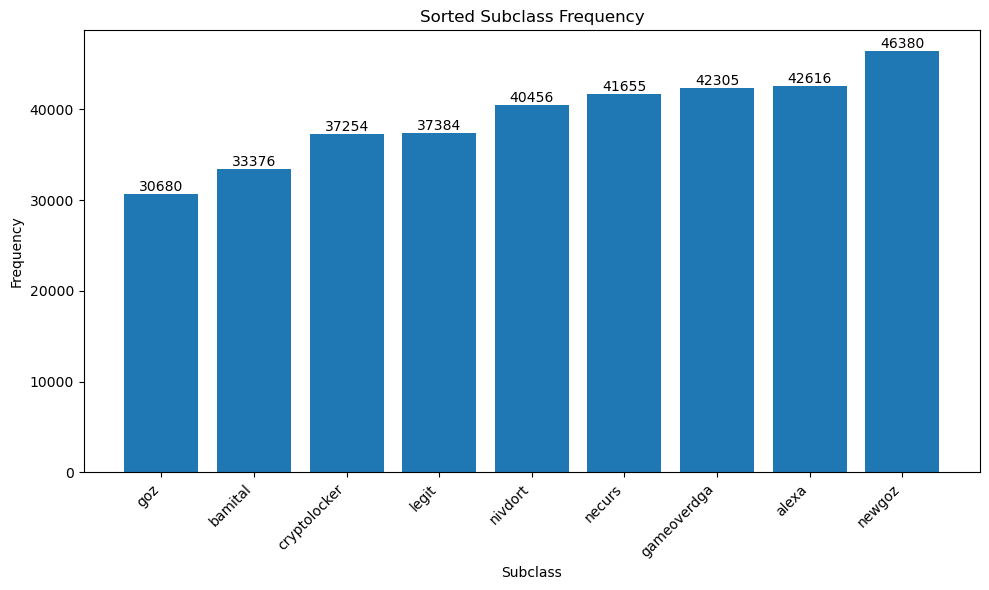

In [31]:
# prompt: visualize the sorted subclass frequency of sliced_df using vertical barchart with each frequency on the bar with 3 significant figures

# Assuming 'sliced_df' is your DataFrame
subclass_counts = sliced_df['subclass'].value_counts().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subclass_counts.index, subclass_counts.values)

# Add frequency labels to the bars with 3 significant figures
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

plt.xlabel('Subclass')
plt.ylabel('Frequency')
plt.title('Sorted Subclass Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 2. Data Pre-processing

In [32]:
import sklearn
print(sklearn.__version__)

1.5.2


In [33]:
import pandas as pd
import torch
from sklearn.preprocessing import OneHotEncoder

# Character-level Tokenization
sliced_df['domain_tokens'] = sliced_df['host'].apply(lambda x: list(x))  # Tokenize to characters
original_df['domain_tokens'] = original_df['host'].apply(lambda x:list(x))

# One-Hot Encoding for subclasses
onehot_encoder = OneHotEncoder(sparse_output=False)
subclass_encoded = onehot_encoder.fit_transform(sliced_df[['subclass']])
sliced_df = sliced_df.join(pd.DataFrame(subclass_encoded, columns=onehot_encoder.get_feature_names_out(['subclass'])))

twohot_encoder = OneHotEncoder(sparse_output=False)
two_subclass_encoded = twohot_encoder.fit_transform(original_df[['subclass']])
original_df = original_df.join(pd.DataFrame(two_subclass_encoded, columns=twohot_encoder.get_feature_names_out(['subclass'])))

In [34]:
# prompt: find the longest length of domain_tokens in sliced_df

# Assuming 'sliced_df' is your DataFrame
max_length = sliced_df['domain_tokens'].apply(len).max()
print(f"The longest length of 'domain_tokens' in 'sliced_df' is: {max_length}")

origin_max_length = original_df['domain_tokens'].apply(len).max()
print(f"The longest length of 'domain_tokens' in 'original_df' is : {origin_max_length}")

The longest length of 'domain_tokens' in 'sliced_df' is: 64
The longest length of 'domain_tokens' in 'original_df' is : 64


In [35]:
subclass_freqs = sliced_df[['subclass_alexa','subclass_bamital','subclass_cryptolocker','subclass_gameoverdga','subclass_goz','subclass_legit','subclass_necurs','subclass_newgoz','subclass_nivdort']].sum()
origin_subclass = original_df[['subclass_alexa','subclass_bamital','subclass_cryptolocker','subclass_gameoverdga','subclass_goz','subclass_legit','subclass_necurs','subclass_newgoz','subclass_nivdort']].sum()

In [36]:
subclass_freqs

subclass_alexa           42616.0
subclass_bamital         33376.0
subclass_cryptolocker    37254.0
subclass_gameoverdga     42305.0
subclass_goz             30680.0
subclass_legit           37384.0
subclass_necurs          41655.0
subclass_newgoz          46380.0
subclass_nivdort         40456.0
dtype: float64

In [37]:
origin_subclass

subclass_alexa           42616.0
subclass_bamital          2086.0
subclass_cryptolocker    37254.0
subclass_gameoverdga      8461.0
subclass_goz              6136.0
subclass_legit           37384.0
subclass_necurs           8331.0
subclass_newgoz           9276.0
subclass_nivdort          8456.0
dtype: float64

In [38]:
#shuffle df
sliced_df = sliced_df.sample(frac=1).reset_index(drop=True)
original_df = original_df.sample(frac=1).reset_index(drop=True)

print(sliced_df)

                                   domain  \
0                            mlaimotakeps   
1                           thsyocxvseljx   
2                            letvwqerxcrl   
3                                     fis   
4                        freepressrelease   
...                                   ...   
352101                            aulokar   
352102                         uxecjubkwe   
352103                     ydlsaducdqviey   
352104  aqc548e2a38abe699c602ee70e4d5c2ce   
352105          1uqw6f7whp7rfagek627vf3ls   

                                         host      subclass  \
0                             mlaimotakeps.to        necurs   
1                            thsyocxvseljx.ru  cryptolocker   
2                             letvwqerxcrl.ac        necurs   
3                                      fis.ru         alexa   
4                     freepressrelease.com.au         legit   
...                                       ...           ...   
352101            

In [39]:
print(original_df)

                          domain                         host      subclass  \
0                nvpkfixnprsdbcs           nvpkfixnprsdbcs.ru  cryptolocker   
1                      clubpoker                clubpoker.net         legit   
2                          vplay                     vplay.ro         alexa   
3                 motionelements           motionelements.com         legit   
4       ifltdlyxpbyorpjffahurcib  ifltdlyxpbyorpjffahurcib.ru           goz   
...                          ...                          ...           ...   
159995              jovcusmlokvg             jovcusmlokvg.com  cryptolocker   
159996                 net4india                net4india.com         legit   
159997                targetimg3               targetimg3.com         legit   
159998                 maijiakan                maijiakan.com         alexa   
159999                payamdaran               payamdaran.net         legit   

                                            domain_

In [40]:
# Create a character to index mapping
char_vocab = sorted(set(''.join(sliced_df['host'])))
char_to_idx = {char: idx for idx, char in enumerate(char_vocab)}
idx_to_char = {idx: char for idx, char in enumerate(char_vocab)}

In [41]:
# prompt: add pad to char_to_idx

# Add a padding token to char_to_idx
char_to_idx['<pad>'] = len(char_to_idx)
idx_to_char[len(idx_to_char)] = '<pad>'
pad_id = char_to_idx['<pad>']

char_to_idx['<unk>'] = len(char_to_idx)
idx_to_char[len(idx_to_char)] = '<unk>'
unk_id = char_to_idx['<unk>']

print(f"pad_id is {pad_id}")
print(f"unk_id is {unk_id}")


pad_id is 39
unk_id is 40


In [42]:
vocab_size = len(char_to_idx)
print(vocab_size)

41


In [43]:
sliced_df

,domain,host,subclass,domain_tokens,subclass_alexa,subclass_bamital,subclass_cryptolocker,subclass_gameoverdga,subclass_goz,subclass_legit,subclass_necurs,subclass_newgoz,subclass_nivdort
0,mlaimotakeps,mlaimotakeps.to,necurs,"[m, l, a, i, m, o, t, a, k, e, p, s, ., t, o]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,thsyocxvseljx,thsyocxvseljx.ru,cryptolocker,"[t, h, s, y, o, c, x, v, s, e, l, j, x, ., r, u]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,letvwqerxcrl,letvwqerxcrl.ac,necurs,"[l, e, t, v, w, q, e, r, x, c, r, l, ., a, c]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,fis,fis.ru,alexa,"[f, i, s, ., r, u]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,freepressrelease,freepressrelease.com.au,legit,"[f, r, e, e, p, r, e, s, s, r, e, l, e, a, s, ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352101,aulokar,aulokar.pro,necurs,"[a, u, l, o, k, a, r, ., p, r, o]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
352102,uxecjubkwe,uxecjubkwe.kz,necurs,"[u, x, e, c, j, u, b, k, w, e, ., k, z]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
352103,ydlsaducdqviey,ydlsaducdqviey.tv,necurs,"[y, d, l, s, a, d, u, c, d, q, v, i, e, y, ., ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
352104,aqc548e2a38abe699c602ee70e4d5c2ce,aqc548e2a38abe699c602ee70e4d5c2ce.org,bamital,"[a, q, c, 5, 4, 8, e, 2, a, 3, 8, a, b, e, 6, ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
!pip install datasets

In [45]:
from datasets import Dataset

# Create a Hugging Face Dataset from the DataFrame
dataset = Dataset.from_pandas(sliced_df)
origin_dataset = Dataset.from_pandas(original_df)

# Define a function to convert domain tokens to indices
def tokenize_and_index(batch):
    # Tokenize to characters and convert to indices
    batch['domain_indices'] = [
        [char_to_idx.get(char, char_to_idx['<unk>']) for char in list(domain)]
        for domain in batch['host']
    ]
    return batch

# Apply the function to the dataset
dataset = dataset.map(tokenize_and_index,batched=True)
origin_dataset = origin_dataset.map(tokenize_and_index,batched=True)

Map:   0%|          | 0/352106 [00:00<?, ? examples/s]

Map:   0%|          | 0/160000 [00:00<?, ? examples/s]

## 3. Model Architecture: Transformer

We will utilize the OG Transformers from ["Attention is All You Need"]((https://arxiv.org/abs/1706.03762), with the following architecture

transformer_architecture.svg

In [46]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [47]:
class PositionalEncoding(nn.Module):
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        # Modified version from: https://pytorch.org/tutorials/beginner/transformer_tutorial.html
        # max_len determines how far the position can have an effect on a token (window)
        
        # Info
        self.dropout = nn.Dropout(dropout_p)
        
        # Encoding - From formula
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)
        
        # PE(pos, 2i) = sin(pos/1000^(2i/dim_model))
        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        
        # PE(pos, 2i + 1) = cos(pos/1000^(2i/dim_model))
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)
        
        pos_encoding = pos_encoding.unsqueeze(0)
        # Saving buffer (same as parameter without gradients needed)
        self.register_buffer("pos_encoding",pos_encoding)
        
    def forward(self, token_embedding: torch.tensor) -> torch.tensor:
        # Ensure the input tensor is of shape (batch_size, sequence_length, dim_model)
        seq_length = token_embedding.size(1)  # Get the sequence length from the input tensor
        return self.dropout(token_embedding + self.pos_encoding[:, :seq_length]) 

In [48]:
import torch
import torch.nn as nn
import math

class EncoderModel(nn.Module):
    def __init__(self, vocab_size, dim_model, num_heads, num_layers, num_classes, dropout=0.1):
        super(EncoderModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim_model)
        self.dim_model = dim_model  
        self.positional_encoder = PositionalEncoding(dim_model, dropout,max_len=64)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(dim_model, num_heads, dim_feedforward=dim_model * 2, dropout=dropout),
            num_layers
        )
        self.out = nn.Linear(dim_model, num_classes)

    def forward(self, src):
        # Validate input shape
        assert src.dim() == 2, "Source input must be 2D (batch_size, src_sequence_length)"

        # Embedding + positional encoding
        src = self.embedding(src) * math.sqrt(self.dim_model)
        src = self.positional_encoder(src)

        # Permute to obtain size (sequence_length, batch_size, dim_model)
        src = src.permute(1, 0, 2)  # (sequence_length, batch_size, dim_model)

        # Pass through the transformer encoder
        encoder_out = self.transformer_encoder(src)  # Only use encoder

        # Pool the output (e.g., mean over the sequence length)
        pooled_out = encoder_out.mean(dim=0)  # Shape: (batch_size, dim_model)

        # Pass through output layer to get class logits
        out = self.out(pooled_out)  # Final shape: (batch_size, num_classes)

        return out

    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)  # Glorot/Xavier initialization
                if m.bias is not None:
                    torch.nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Embedding):
                torch.nn.init.xavier_uniform_(m.weight) 

In [49]:
print(torch.__version__)          # Check PyTorch version
print(torch.version.cuda)         # Check CUDA version
print(torch.cuda.is_available()) 

2.2.2
12.1
True


In [50]:
from torch.optim.lr_scheduler import LambdaLR

In [51]:
# Initialize your model, loss function, and optimizer
# device = "cuda" if torch.cuda.is_available() else "cpu"
model = EncoderModel(
    vocab_size=vocab_size, num_classes=9,dim_model=512, num_heads=4, num_layers=3, dropout=0.1
)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # For multiclass classification
optimizer = optim.Adam(model.parameters(), lr=1.0, betas=(0.9, 0.98), eps=1e-9)
warmup_steps = 1000

def rate(step, model_size=512, factor=1, warmup=warmup_steps):
    """
    we have to default the step to 1 for LambdaLR function
    to avoid zero raising to negative power.
    """
    if step == 0:
        step = 1
    return factor * (
        model_size ** (-0.5) * min(step ** (-0.5), step * warmup ** (-1.5))
    )

over_scheduler = LambdaLR(optimizer, rate)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [52]:
dataset

Dataset({
    features: ['domain', 'host', 'subclass', 'domain_tokens', 'subclass_alexa', 'subclass_bamital', 'subclass_cryptolocker', 'subclass_gameoverdga', 'subclass_goz', 'subclass_legit', 'subclass_necurs', 'subclass_newgoz', 'subclass_nivdort', 'domain_indices'],
    num_rows: 352106
})

In [53]:
origin_dataset

Dataset({
    features: ['domain', 'host', 'subclass', 'domain_tokens', 'subclass_alexa', 'subclass_bamital', 'subclass_cryptolocker', 'subclass_gameoverdga', 'subclass_goz', 'subclass_legit', 'subclass_necurs', 'subclass_newgoz', 'subclass_nivdort', 'domain_indices'],
    num_rows: 160000
})

In [54]:
unique_subclasses = sliced_df['subclass'].unique()
print(unique_subclasses)

['necurs' 'cryptolocker' 'alexa' 'legit' 'gameoverdga' 'nivdort' 'goz'
 'newgoz' 'bamital']


In [55]:
onehot_encoder = OneHotEncoder(sparse_output=False)
subclass_encoded = onehot_encoder.fit_transform(sliced_df[['subclass']])
subclass_df = pd.DataFrame(subclass_encoded, columns=onehot_encoder.get_feature_names_out(['subclass']))
print("One-hot encoded columns:", subclass_df.columns)

One-hot encoded columns: Index(['subclass_alexa', 'subclass_bamital', 'subclass_cryptolocker',
       'subclass_gameoverdga', 'subclass_goz', 'subclass_legit',
       'subclass_necurs', 'subclass_newgoz', 'subclass_nivdort'],
      dtype='object')


In [56]:
categories = onehot_encoder.categories_[0] 
print(categories)

['alexa' 'bamital' 'cryptolocker' 'gameoverdga' 'goz' 'legit' 'necurs'
 'newgoz' 'nivdort']


In [57]:
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F

def convert_to_tensors(batch, max_length=64):  # Set max_length to your desired value
    subclass_columns = [col for col in batch.keys() if col.startswith('subclass_')]
    batch_size = len(batch['domain_indices'])
    padded_input_ids = torch.full((batch_size, max_length), fill_value=38, dtype=torch.long)  # Use 38 for padding
    for i, indices in enumerate(batch['domain_indices']):
        
        tensor_indices = torch.tensor(indices, dtype=torch.long)

        # Determine how much to truncate or pad
        if tensor_indices.size(0) > max_length:
            padded_input_ids[i] = tensor_indices[:max_length]  # Truncate
        else:
            padded_input_ids[i, :tensor_indices.size(0)] = tensor_indices  # Pad by default value (38)

    # Convert labels to tensors
    labels = torch.tensor([list(batch[col]) for col in subclass_columns], dtype=torch.float).T
    class_indices = torch.argmax(labels, dim=1)
    return {
        'input_ids': padded_input_ids,
        'labels': class_indices
    }
# Map the conversion function
dataset = dataset.map(convert_to_tensors, batched=True).with_format("torch")
origin_dataset = origin_dataset.map(convert_to_tensors,batched=True).with_format("torch")

Map:   0%|          | 0/352106 [00:00<?, ? examples/s]

Map:   0%|          | 0/160000 [00:00<?, ? examples/s]

In [58]:
dataset = dataset.remove_columns([col for col in dataset.column_names if col not in ['input_ids', 'labels']])
origin_dataset = origin_dataset.remove_columns([col for col in origin_dataset.column_names if col not in ['input_ids', 'labels']])

In [59]:
from datasets import ClassLabel

In [60]:
class_labels = ClassLabel(names=list(categories))
dataset = dataset.cast_column('labels', class_labels)
origin_dataset= origin_dataset.cast_column('labels',class_labels)

Casting the dataset:   0%|          | 0/352106 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/160000 [00:00<?, ? examples/s]

In [61]:
# Create Oversampled DataLoader
dataset_split = dataset.train_test_split(test_size=0.1, stratify_by_column='labels',shuffle=True, seed=42)
train_dataset = dataset_split["train"]
val_dataset = dataset_split["test"]

over_train_loader = DataLoader(
    train_dataset,
    batch_size=512,
    shuffle=True,
    num_workers=8,            # Adjust as necessary
    pin_memory=True,          # Enable pinned memory for faster transfer to GPU
    persistent_workers=True,
    prefetch_factor=2# Keep workers alive across epochs
)

over_val_loader = DataLoader(
    val_dataset,
    batch_size=512,
    shuffle=False,
    num_workers=8,            # Adjust as necessary
    pin_memory=True,          # Enable pinned memory for faster transfer to GPU
    persistent_workers=True,
    prefetch_factor=2 # Keep workers alive across epochs
)

In [62]:
# Create Original DataLoader
origin_dataset_split = origin_dataset.train_test_split(test_size=0.1, stratify_by_column='labels',shuffle=True, seed=42)
origin_train_dataset = origin_dataset_split["train"]
origin_val_dataset = origin_dataset_split["test"]

origin_train_loader = DataLoader(
    origin_train_dataset,
    batch_size=512,
    shuffle=True,
    num_workers=8,            # Adjust as necessary
    pin_memory=True,          # Enable pinned memory for faster transfer to GPU
    persistent_workers=True,
    prefetch_factor=2# Keep workers alive across epochs
)

origin_val_loader = DataLoader(
    origin_val_dataset,
    batch_size=512,
    shuffle=False,
    num_workers=8,            # Adjust as necessary
    pin_memory=True,          # Enable pinned memory for faster transfer to GPU
    persistent_workers=True,
    prefetch_factor=2 # Keep workers alive across epochs
)

In [63]:
origin_train_dataset

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 144000
})

In [64]:
from collections import Counter
def check_label_distribution(data_loader):
    """Check the distribution of labels in the DataLoader."""
    label_counts = Counter()

    # Iterate through the DataLoader
    for batch in data_loader:
        # Assuming 'labels' key in the batch
        labels = batch['labels']
        
        # If labels are one-hot encoded, convert them to class indices
        if labels.ndim > 1:  # For one-hot encoded
            labels = torch.argmax(labels, dim=1)  # Convert to class indices

        # Update the label counts
        label_counts.update(labels.cpu().numpy())  # Move to CPU and convert to numpy for counting

    return label_counts

In [65]:
label_distribution = check_label_distribution(origin_train_loader)
print(label_distribution)

Counter({0: 38355, 5: 33646, 2: 33529, 7: 8348, 3: 7615, 8: 7610, 6: 7498, 4: 5522, 1: 1877})


In [66]:
label_distribution = check_label_distribution(over_train_loader)
print(label_distribution)

Counter({7: 41742, 0: 38354, 3: 38074, 6: 37490, 8: 36410, 5: 33646, 2: 33529, 1: 30038, 4: 27612})


In [67]:
val_label_distribution = check_label_distribution(origin_val_loader)
print(val_label_distribution)

Counter({0: 4261, 5: 3738, 2: 3725, 7: 928, 3: 846, 8: 846, 6: 833, 4: 614, 1: 209})


In [68]:
val_label_distribution = check_label_distribution(over_val_loader)
print(val_label_distribution)

Counter({7: 4638, 0: 4262, 3: 4231, 6: 4165, 8: 4046, 5: 3738, 2: 3725, 1: 3338, 4: 3068})


In [69]:
max_length

64

In [70]:
import multiprocess as mp

In [71]:
import os

# Directory to save the model

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [72]:
import psutil

# Get the total, available, used, and percentage of RAM
memory_info = psutil.virtual_memory()
print(f"Total Memory: {memory_info.total / (1024**3):.2f} GB")
print(f"Available Memory: {memory_info.available / (1024**3):.2f} GB")
print(f"Used Memory: {memory_info.used / (1024**3):.2f} GB")
print(f"Memory Usage Percentage: {memory_info.percent}%")

Total Memory: 30.89 GB
Available Memory: 26.99 GB
Used Memory: 3.45 GB
Memory Usage Percentage: 12.6%


In [73]:
def apply_temperature(logits, temperature):
    return logits / temperature

In [76]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim

def run_epoch(data):
    if __name__ == '__main__':
        mp.set_start_method('spawn', force=True)

        model_save_dir = f'./saved_models_{data}'
        os.makedirs(model_save_dir, exist_ok=True)
        model_save_path = os.path.join(model_save_dir, 'final_model.pth')
        metrics_save_path = os.path.join(model_save_dir, 'training_metrics.pth')

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model =  EncoderModel(
    vocab_size=vocab_size, num_classes=9,dim_model=512, num_heads=4, num_layers=3, dropout=0.1
)
        model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=1.0, betas=(0.9, 0.98), eps=1e-9)
        warmup_steps = 1000
        scheduler = LambdaLR(optimizer, rate)
        if data == "oversample":
            train_loader = over_train_loader
            val_loader = over_val_loader
        else:
            train_loader = origin_train_loader
            val_loader = origin_val_loader

        temperature = 1.5
        num_epochs = 10
        accum_iter = 10
        patience = 3  # Number of epochs to wait for improvement
        best_val_loss = float('inf')
        patience_counter = 0  # Counter to track patience
        metrics = {'avg_train_loss': [], 'avg_val_loss': [], 'elapsed_time': [], 'epoch': []}


        for epoch in range(num_epochs):
            start_time = time.time()
            model.train()
            epoch_loss = 0
            tokens = 0
            total_tokens = 0
            n_accum = 0
            start = time.time()

            # Training Loop
            for i, batch in enumerate(train_loader):
                src = batch['input_ids'].to(device)
                tgt = batch['labels'].to(device)
                output = model(src)
                scaled_output = apply_temperature(output, temperature) #temperature scaling
                # Compute loss using the scaled output
                loss = criterion(scaled_output, tgt)

                loss.backward()

                if i % accum_iter == 0:
                    optimizer.step()
                    scheduler.step()
                    optimizer.zero_grad(set_to_none=True)
                    n_accum += 1
                        # Update scheduler once per epoch
               

                epoch_loss += loss.item()
                tokens += src.size(0)
                total_tokens += src.size(0)

                if (i + 1) % 100 == 0:
                    lr = optimizer.param_groups[0]["lr"]
                    batch_elapsed = time.time() - start
                    epoch_elapsed = time.time() - start_time
                    avg_batch_time = epoch_elapsed / (i + 1)
                    estimated_total_time = avg_batch_time * len(train_loader)
                    remaining_time = estimated_total_time - epoch_elapsed

                    print(
                        f"Epoch Step: {i + 1:6d} | Loss: {epoch_loss / (i + 1):6.2f} | "
                        f"Tokens / Sec: {tokens / batch_elapsed:7.1f} | Learning Rate: {lr:.1e} | ETA: {remaining_time / 60:.1f} min"
                    )
                    tokens = 0
                    start = time.time()

            avg_train_loss = epoch_loss / total_tokens
            metrics['avg_train_loss'].append(avg_train_loss)

            # Validation Loop
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for val_batch in val_loader:
                    val_src = val_batch['input_ids'].to(device)
                    val_tgt = val_batch['labels'].to(device)
                    val_output = model(val_src)
                    val_scaled_output = apply_temperature(val_output,temperature)
                    val_loss += criterion(val_scaled_output, val_tgt).item() * val_batch['input_ids'].size(0)

            avg_val_loss = val_loss / len(val_loader.dataset)
            metrics['avg_val_loss'].append(avg_val_loss)

            elapsed_time = time.time() - start_time
            metrics['elapsed_time'].append(elapsed_time)
            metrics['epoch'].append(epoch + 1)

            print(f'Epoch {epoch + 1}/{num_epochs}, '
                  f'Avg Train Loss: {avg_train_loss:.4f}, '
                  f'Avg Val Loss: {avg_val_loss:.4f}, '
                  f'Elapsed Time: {elapsed_time:.2f} seconds')

            # Check if validation loss has improved
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                patience_counter = 0  # Reset patience counter
                # Save the best model
                best_model_path = os.path.join(model_save_dir, 'best_model.pth')
                torch.save(model.state_dict(), best_model_path)
                print(f'New best model saved to {best_model_path}')
            else:
                patience_counter += 1
                print(f"No improvement in validation loss. Patience counter: {patience_counter}/{patience}")

            # Early stopping check
            if patience_counter >= patience:
                print("Early stopping triggered. Stopping training.")
                break

            # Save model for each epoch
            model_save_path = os.path.join(model_save_dir, f'model_epoch_{epoch + 1}.pth')
            torch.save(model.state_dict(), model_save_path)
            print(f'Model for epoch {epoch + 1} saved to {model_save_path}')
            metrics_save_path = os.path.join(model_save_dir, 'metrics.pth')
            torch.save(metrics,metrics_save_path)
            print(f'Metrics for epoch {epoch + 1} saved to {metrics_save_path}')


In [77]:
run_epoch("original")
run_epoch("oversample")

Epoch Step:    100 | Loss:   2.23 | Tokens / Sec:  1396.1 | Learning Rate: 1.4e-05 | ETA: 1.1 min
Epoch Step:    200 | Loss:   2.08 | Tokens / Sec:  1382.8 | Learning Rate: 2.8e-05 | ETA: 0.5 min
Epoch 1/10, Avg Train Loss: 0.0039, Avg Val Loss: 1.7181, Elapsed Time: 107.58 seconds
New best model saved to ./saved_models_original/best_model.pth
Model for epoch 1 saved to ./saved_models_original/model_epoch_1.pth
Metrics for epoch 1 saved to ./saved_models_original/metrics.pth
Epoch Step:    100 | Loss:   1.62 | Tokens / Sec:  1372.0 | Learning Rate: 5.5e-05 | ETA: 1.1 min
Epoch Step:    200 | Loss:   1.53 | Tokens / Sec:  1372.8 | Learning Rate: 6.8e-05 | ETA: 0.5 min
Epoch 2/10, Avg Train Loss: 0.0029, Avg Val Loss: 1.2627, Elapsed Time: 108.64 seconds
New best model saved to ./saved_models_original/best_model.pth
Model for epoch 2 saved to ./saved_models_original/model_epoch_2.pth
Metrics for epoch 2 saved to ./saved_models_original/metrics.pth
Epoch Step:    100 | Loss:   1.22 | Toke

In [82]:
origin_model_dir = './saved_models_original'
origin_history = os.path.join(origin_model_dir, 'metrics.pth')
origin_model = os.path.join(origin_model_dir, 'best_model.pth')

oversample_model_dir = './saved_models_oversample'
oversample_history = os.path.join(oversample_model_dir, 'metrics.pth')
oversample_model = os.path.join(oversample_model_dir, 'best_model.pth')

In [ ]:
# history ={'epoch': [1, 2, 3, 4, 5, 6, 7],
#  'avg_train_loss': [0.0031, 0.0021, 0.002, 0.002, 0.0019, 0.0019, 0.0019],
#  'avg_val_loss': [1.1957, 1.08, 1.0185, 1.0777, 1.0005, 1.0059, 1.0144],
#  'elapsed_time': [229.0, 229.12, 228.84, 228.79, 228.73, 228.66, 227.93]}

In [80]:
original_model = EncoderModel(
    vocab_size=vocab_size, num_classes=9,dim_model=512, num_heads=4, num_layers=3, dropout=0.1
)
augment_model =EncoderModel(
    vocab_size=vocab_size, num_classes=9,dim_model=512, num_heads=4, num_layers=3, dropout=0.1
)

In [83]:
original_model.load_state_dict(torch.load(origin_model))
original_history = torch.load(origin_history)

In [84]:
augment_model.load_state_dict(torch.load(oversample_model))
augment_history = torch.load(oversample_history)

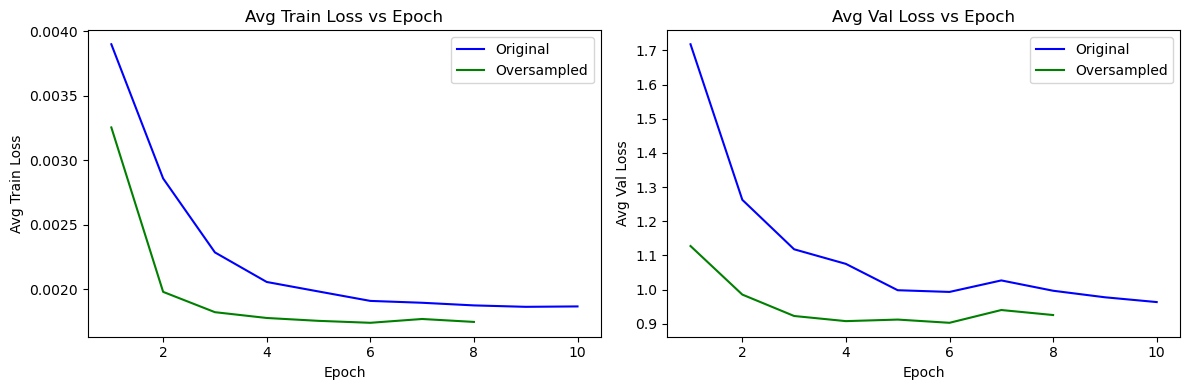

In [87]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

history1,history2 = original_history, augment_history
# First subplot: avg_train_loss vs epoch (with cumulative elapsed_time)
# Plot for history1
ax1.plot(history1['epoch'], history1['avg_train_loss'], label='Original', color='blue')
# Plot for history2
ax1.plot(history2['epoch'], history2['avg_train_loss'], label='Oversampled', color='green')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg Train Loss')
ax1.set_title('Avg Train Loss vs Epoch')

# Secondary x-axis for cumulative elapsed time
ax1.legend()

# Second subplot: avg_val_loss vs epoch
# Plot for history1
ax2.plot(history1['epoch'], history1['avg_val_loss'], label='Original', color='blue')
# Plot for history2
ax2.plot(history2['epoch'], history2['avg_val_loss'], label='Oversampled', color='green')

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Avg Val Loss')
ax2.set_title('Avg Val Loss vs Epoch')
ax2.legend()

plt.tight_layout()
plt.show()



In [88]:
from tqdm import tqdm

In [92]:
# Function to preprocess and generate predictions and true labels
def generate_predictions_and_labels(model,data_loader):
    """Generates predictions and true labels for the given data loader."""
    predictions = []
    true_labels = []
    model.eval()  # Set model to eval mode
    total_length = len(data_loader)

    with torch.no_grad():  # Disable gradient tracking for inference
        for batch in tqdm(data_loader, total=total_length, desc="Iterating through..."):
            # Preprocess inputs and labels
            inputs = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            temperature = 1.5
            # Forward pass
            outputs = model(inputs)
            scaled_output = apply_temperature(outputs, temperature)
            # Post-process outputs to get predictions
            predicted_labels = torch.argmax(scaled_output, dim=1)  # For class indices
            predictions.extend(predicted_labels.cpu().numpy())  # Append predictions
            true_labels.extend(labels.cpu().numpy())  # Append true labels

    return predictions, true_labels



In [93]:
original_model.eval()  # Set model to evaluation mode

# Move model to device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
original_model.to(device)

train_predictions,train_labels = generate_predictions_and_labels(original_model,origin_train_loader)
valid_predictions,valid_labels = generate_predictions_and_labels(original_model,origin_val_loader)

Iterating through...: 100%|██████████| 32/32 [00:03<00:00,  8.78it/s]


In [94]:
len(train_predictions)

144000

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

In [96]:
def multi_label_confusion(y_pred,y_test,dt=categories):
  
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=dt)
  disp.plot(xticks_rotation="vertical",cmap="cividis")
  plt.show()

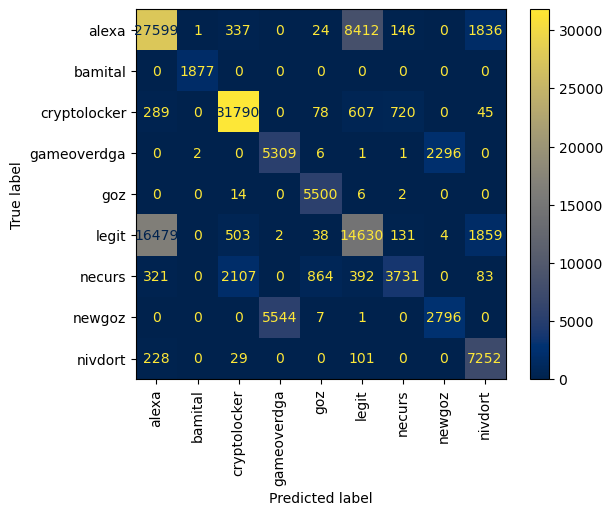

In [97]:
#train confusion matrix

multi_label_confusion(train_predictions,train_labels)

In [98]:
transform_metrics = classification_report(train_labels,train_predictions,target_names=categories)
print(transform_metrics)

              precision    recall  f1-score   support

       alexa       0.61      0.72      0.66     38355
     bamital       1.00      1.00      1.00      1877
cryptolocker       0.91      0.95      0.93     33529
 gameoverdga       0.49      0.70      0.57      7615
         goz       0.84      1.00      0.91      5522
       legit       0.61      0.43      0.51     33646
      necurs       0.79      0.50      0.61      7498
      newgoz       0.55      0.33      0.42      8348
     nivdort       0.65      0.95      0.78      7610

    accuracy                           0.70    144000
   macro avg       0.72      0.73      0.71    144000
weighted avg       0.70      0.70      0.69    144000



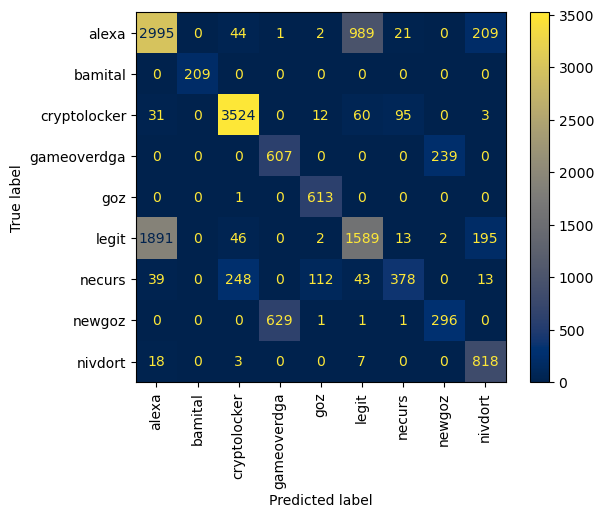

In [99]:
# validation confusion matrix
multi_label_confusion(valid_predictions,valid_labels)

In [100]:
val_transform_metrics = classification_report(valid_labels,valid_predictions,target_names=categories)
print(val_transform_metrics)

              precision    recall  f1-score   support

       alexa       0.60      0.70      0.65      4261
     bamital       1.00      1.00      1.00       209
cryptolocker       0.91      0.95      0.93      3725
 gameoverdga       0.49      0.72      0.58       846
         goz       0.83      1.00      0.90       614
       legit       0.59      0.43      0.49      3738
      necurs       0.74      0.45      0.56       833
      newgoz       0.55      0.32      0.40       928
     nivdort       0.66      0.97      0.79       846

    accuracy                           0.69     16000
   macro avg       0.71      0.73      0.70     16000
weighted avg       0.69      0.69      0.68     16000



In [103]:
# Get the unique classes
classes = np.unique(valid_labels)

# Calculate accuracy for each class
class_accuracies = []
for cls in classes:
    cls_indices = np.where(np.array(valid_labels) == cls)[0]  # Convert y_true to a numpy array and get indices
    cls_accuracy = accuracy_score(np.array(valid_labels)[cls_indices], np.array(valid_predictions)[cls_indices])  # Calculate accuracy for the class
    class_accuracies.append(cls_accuracy)

# Calculate macro accuracy
macro_accuracy = np.mean(class_accuracies)
print(f"Macro Accuracy: {macro_accuracy:.2f}")

Macro Accuracy: 0.73


In [107]:
from sklearn.metrics import roc_auc_score

# Assuming train_predictions and valid_predictions are of shape (num_samples, num_classes)
# and contain probability scores for each class
# Convert train_labels and valid_labels to a one-hot encoded format if necessary.

# For training data
encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = encoder.fit_transform(np.array(train_labels).reshape(-1, 1))
train_predictions_one_hot = encoder.transform(np.array(train_predictions).reshape(-1, 1))

train_roc_auc_macro = roc_auc_score(train_labels_one_hot, train_predictions_one_hot, average='macro', multi_class='ovo')

valid_labels_one_hot = encoder.fit_transform(np.array(valid_labels).reshape(-1, 1))
valid_predictions_one_hot = encoder.transform(np.array(valid_predictions).reshape(-1, 1))
# For validation data
valid_roc_auc_macro = roc_auc_score(valid_labels_one_hot, valid_predictions_one_hot, average='macro', multi_class='ovo')

print("Train Macro ROC-AUC:", train_roc_auc_macro)
print("Validation Macro ROC-AUC:", valid_roc_auc_macro)


Train Macro ROC-AUC: 0.8446450535661055
Validation Macro ROC-AUC: 0.8411749520002835


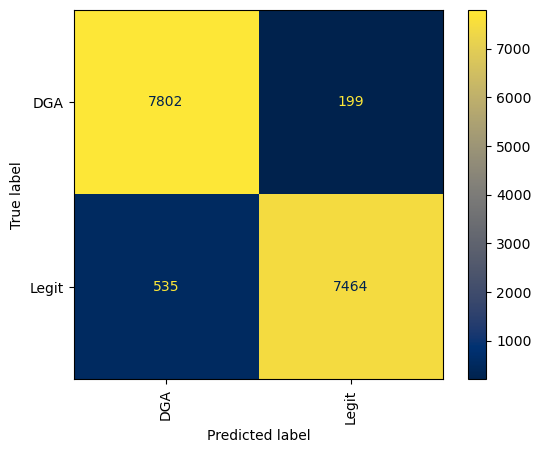

In [108]:
positive_classes = [0, 5]
def map_to_binary(labels, positive_classes):
    return np.isin(labels, positive_classes).astype(int)

# Apply the mapping to train and validation labels
valid_labels_binary = map_to_binary(valid_labels, positive_classes)

# Calculate binary ROC-AUC (assuming predictions are probabilities for each class)
valid_predictions_binary = map_to_binary(valid_predictions, positive_classes)

multi_label_confusion(valid_predictions_binary,valid_labels_binary,dt=['DGA','Legit'])

In [116]:
augment_model.eval()  # Set model to evaluation mode

# Move model to device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
augment_model.to(device)

over_train_predictions,over_train_labels = generate_predictions_and_labels(augment_model,over_train_loader)
over_valid_predictions,over_valid_labels = generate_predictions_and_labels(augment_model,over_val_loader)

Iterating through...: 100%|██████████| 69/69 [00:08<00:00,  8.57it/s]


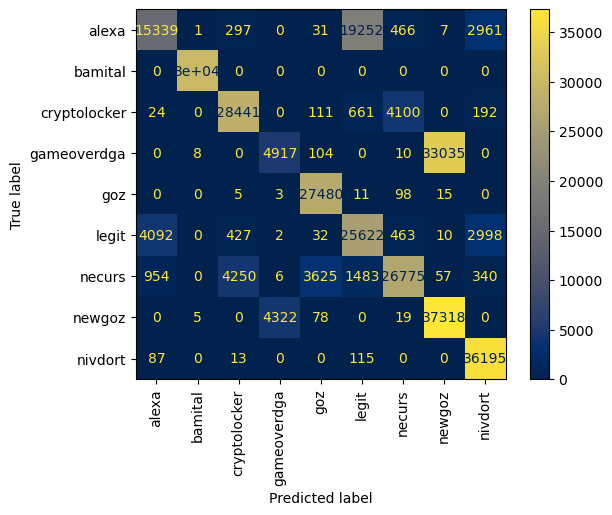

In [110]:
multi_label_confusion(over_train_predictions,over_train_labels)

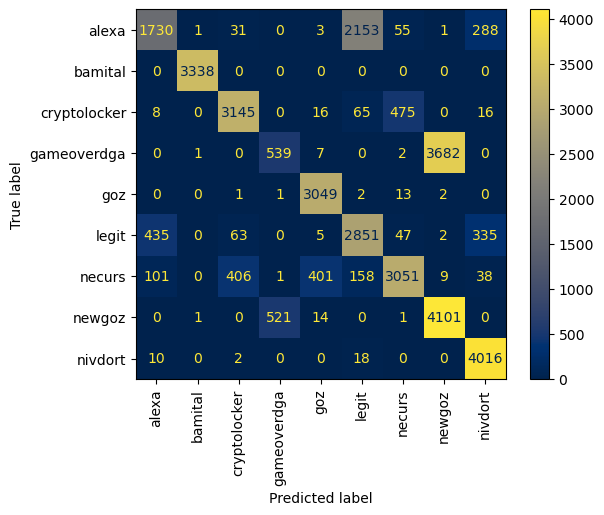

In [111]:
multi_label_confusion(over_valid_predictions,over_valid_labels)

In [112]:
train_transform_metrics = classification_report(over_train_labels,over_train_predictions,target_names=categories)
print(train_transform_metrics)

              precision    recall  f1-score   support

       alexa       0.75      0.40      0.52     38354
     bamital       1.00      1.00      1.00     30038
cryptolocker       0.85      0.85      0.85     33529
 gameoverdga       0.53      0.13      0.21     38074
         goz       0.87      1.00      0.93     27612
       legit       0.54      0.76      0.63     33646
      necurs       0.84      0.71      0.77     37490
      newgoz       0.53      0.89      0.67     41742
     nivdort       0.85      0.99      0.92     36410

    accuracy                           0.73    316895
   macro avg       0.75      0.75      0.72    316895
weighted avg       0.74      0.73      0.71    316895



In [113]:
val_transform_metrics = classification_report(over_valid_labels,over_valid_predictions,target_names=categories)
print(val_transform_metrics)

              precision    recall  f1-score   support

       alexa       0.76      0.41      0.53      4262
     bamital       1.00      1.00      1.00      3338
cryptolocker       0.86      0.84      0.85      3725
 gameoverdga       0.51      0.13      0.20      4231
         goz       0.87      0.99      0.93      3068
       legit       0.54      0.76      0.63      3738
      necurs       0.84      0.73      0.78      4165
      newgoz       0.53      0.88      0.66      4638
     nivdort       0.86      0.99      0.92      4046

    accuracy                           0.73     35211
   macro avg       0.75      0.75      0.72     35211
weighted avg       0.74      0.73      0.71     35211



In [117]:
from sklearn.metrics import roc_auc_score

# Assuming train_predictions and valid_predictions are of shape (num_samples, num_classes)
# and contain probability scores for each class
# Convert train_labels and valid_labels to a one-hot encoded format if necessary.

# For training data
encoder = OneHotEncoder(sparse_output=False)
over_train_labels_one_hot = encoder.fit_transform(np.array(over_train_labels).reshape(-1, 1))
over_train_predictions_one_hot = encoder.transform(np.array(over_train_predictions).reshape(-1, 1))

train_roc_auc_macro = roc_auc_score(over_train_labels,over_train_predictions_one_hot, average='macro', multi_class='ovo')

# For validation data

over_valid_labels_one_hot = encoder.fit_transform(np.array(over_valid_labels).reshape(-1, 1))
over_valid_predictions_one_hot = encoder.transform(np.array(over_valid_predictions).reshape(-1, 1))
valid_roc_auc_macro = roc_auc_score(over_valid_labels,over_valid_predictions_one_hot, average='macro', multi_class='ovo')

print("Train Macro ROC-AUC:", train_roc_auc_macro)
print("Validation Macro ROC-AUC:", valid_roc_auc_macro)


Train Macro ROC-AUC: 0.8585227353629269
Validation Macro ROC-AUC: 0.8589656911588397


In [118]:
# Get the unique classes
classes = np.unique(over_valid_labels)

# Calculate accuracy for each class
class_accuracies = []
for cls in classes:
    cls_indices = np.where(np.array(over_valid_labels) == cls)[0]  # Convert y_true to a numpy array and get indices
    cls_accuracy = accuracy_score(np.array(over_valid_labels)[cls_indices], np.array(over_valid_predictions)[cls_indices])  # Calculate accuracy for the class
    class_accuracies.append(cls_accuracy)

# Calculate macro accuracy
macro_accuracy = np.mean(class_accuracies)
print(f"Macro Accuracy: {macro_accuracy:.2f}")

Macro Accuracy: 0.75


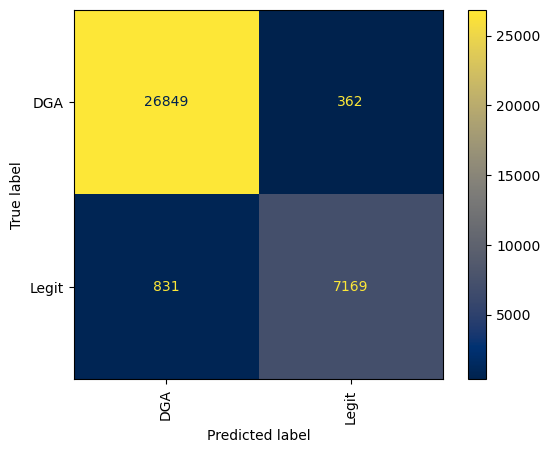

In [119]:
over_valid_labels_binary = map_to_binary(over_valid_labels, positive_classes)

# Calculate binary ROC-AUC (assuming predictions are probabilities for each class)
over_valid_predictions_binary = map_to_binary(over_valid_predictions, positive_classes)

multi_label_confusion(over_valid_predictions_binary,over_valid_labels_binary,dt=['DGA','Legit'])

We generate/find new unseen samples for all the classes.

* `'Alexa'`: Top 1M Alexa Ranking (shuffled to get ~10000)
* `'Legit'`: Majestic Million (shuffled to get ~10000)
* `'gameoverdga', 'newgoz', 'goz', 'necurs', 'bamital','cryptolocker'`: Using our Oversampling/Augmentation Methods (data_augment())
* `'nivdort'`: Using our Augmentation Methods (generate_nivdort_domains())

In [231]:
import pandas as pd

# Load Alexa data and take a random sample of 10,000 rows
!wget https://raw.githubusercontent.com/mozilla/cipherscan/refs/heads/master/top1m/top-1m.csv
alexa_df = pd.read_csv('top-1m.csv', names=['rank', 'host'])
alexa_sample = alexa_df.sample(n=10000, random_state=42)

# Extract the domain (without TLD) from the 'host' column
def extract_domain(host):
    """Extracts the domain part (before the TLD) from a host string."""
    try:
        return host.split('.')[0]
    except IndexError:
        return None

# Apply function to create 'domain' column
alexa_sample['domain'] = alexa_sample['host'].apply(extract_domain)

# Create test_df from sampled Alexa domains with subclass 'alexa'
test_df = alexa_sample[['domain']].drop_duplicates().copy()
test_df['subclass'] = 'alexa'
test_df = test_df.reset_index(drop=True)

# Load Majestic Million data and sample 10,000 rows
!wget https://downloads.majestic.com/majestic_million.csv
majestic_df = pd.read_csv('majestic_million.csv')
majestic_sample = majestic_df.sample(n=10000, random_state=42)

# Extract domain name without TLD from 'Domain' column in Majestic data
def extract_domain_without_tld(domain):
    """Extracts the domain without the TLD from a full domain name."""
    try:
        parts = domain.split('.')
        return parts[0] if len(parts) > 1 else domain
    except Exception:
        return None

# Create a new DataFrame with extracted Majestic domains and subclass 'benign'
majestic_sample['domain'] = majestic_sample['Domain'].apply(extract_domain_without_tld)
majestic_domains = majestic_sample[['domain']].drop_duplicates().copy()
majestic_domains['subclass'] = 'legit'

# Concatenate with test_df, drop duplicates, and reset index
test_df = pd.concat([test_df, majestic_domains], ignore_index=True)
test_df = test_df.drop_duplicates(subset=['domain'], keep='first').reset_index(drop=True)

# Final test_df output
test_df


--2024-10-31 06:55:23--  https://raw.githubusercontent.com/mozilla/cipherscan/refs/heads/master/top1m/top-1m.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22926436 (22M) [text/plain]
Saving to: ‘top-1m.csv.4’

100%[======================================>] 22,926,436  --.-K/s   in 0.06s   

2024-10-31 06:55:24 (386 MB/s) - ‘top-1m.csv.4’ saved [22926436/22926436]

--2024-10-31 06:55:25--  https://downloads.majestic.com/majestic_million.csv
Resolving downloads.majestic.com (downloads.majestic.com)... 185.17.199.9
Connecting to downloads.majestic.com (downloads.majestic.com)|185.17.199.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80481124 (77M) [text/csv]
Saving to: ‘majestic_million.csv.4’

100%[============================

,domain,subclass
0,dynamicsights,alexa
1,multicards,alexa
2,is-elani,alexa
3,boldakrut13,alexa
4,haiguiwang,alexa
...,...,...
19832,nasiralimusicals,legit
19833,realtoreel-studios,legit
19834,tnbsbcn,legit
19835,breakthroughonline,legit


In [232]:
print(test_df['subclass'].value_counts())

subclass
alexa    9921
legit    9916
Name: count, dtype: int64


In [233]:
sliced_df['subclass'].value_counts()

subclass
newgoz          46380
alexa           42616
gameoverdga     42305
necurs          41655
nivdort         40456
legit           37384
cryptolocker    37254
bamital         33376
goz             30680
Name: count, dtype: int64

In [234]:
import pandas as pd
import random
from tqdm import tqdm  # Import tqdm for progress tracking

target_subclasses = ['gameoverdga', 'newgoz', 'goz', 'necurs', 'bamital', 'cryptolocker']

# Define the number of desired augmentations for each subclass
desired_examples = 10000

# Initialize the DataFrame to hold all new augmented data
all_new_rows = []  

# Iterate through each subclass with a progress bar
for subclass in tqdm(target_subclasses, desc="Augmenting Data"):
    i = 0
    domains_to_augment = sliced_df[sliced_df['subclass'] == subclass]['domain'].tolist()
    random.shuffle(domains_to_augment) 
    augmented_domains = set()  # Use a set to avoid duplicates

    # Generate augmented domains until we reach the desired number
    while len(augmented_domains) < desired_examples:
        for domain in domains_to_augment:
            # Generate augmented domains for each original domain
            new_augmentations = data_augment(domain, num_augmentations=1)  # Adjust this based on your need

            # Add new augmentations to the set
            augmented_domains.update(new_augmentations)

            if i % 100 == 0:
                print(f"{i} examples augmented for subclass '{subclass}'")
            i += 1

            # Stop if we've reached the desired number
            if len(augmented_domains) >= desired_examples:
                break  # Break the inner loop to check the while condition again

    # Prepare new rows for the DataFrame
    subclass_rows = [{'domain': augmented_domain, 'subclass': subclass} for augmented_domain in augmented_domains]

    # If we've exceeded the desired number, truncate the list
    if len(subclass_rows) > desired_examples:
        subclass_rows = subclass_rows[:desired_examples]

    # Add the rows for the current subclass to the list for all new rows
    all_new_rows.extend(subclass_rows)

# Convert the list of all new rows to a DataFrame and append it to the original test DataFrame
if all_new_rows:
    new_df = pd.DataFrame(all_new_rows)
    test_df = pd.concat([test_df, new_df], ignore_index=True)



Augmenting Data:  17%|█▋        | 1/6 [00:00<00:00,  7.32it/s]

0 examples augmented for subclass 'gameoverdga'
100 examples augmented for subclass 'gameoverdga'
200 examples augmented for subclass 'gameoverdga'
300 examples augmented for subclass 'gameoverdga'
400 examples augmented for subclass 'gameoverdga'
500 examples augmented for subclass 'gameoverdga'
600 examples augmented for subclass 'gameoverdga'
700 examples augmented for subclass 'gameoverdga'
800 examples augmented for subclass 'gameoverdga'
900 examples augmented for subclass 'gameoverdga'
1000 examples augmented for subclass 'gameoverdga'
1100 examples augmented for subclass 'gameoverdga'
1200 examples augmented for subclass 'gameoverdga'
1300 examples augmented for subclass 'gameoverdga'
1400 examples augmented for subclass 'gameoverdga'
1500 examples augmented for subclass 'gameoverdga'
1600 examples augmented for subclass 'gameoverdga'
1700 examples augmented for subclass 'gameoverdga'
1800 examples augmented for subclass 'gameoverdga'
1900 examples augmented for subclass 'gameo

Augmenting Data:  33%|███▎      | 2/6 [00:00<00:00,  7.60it/s]

0 examples augmented for subclass 'newgoz'
100 examples augmented for subclass 'newgoz'
200 examples augmented for subclass 'newgoz'
300 examples augmented for subclass 'newgoz'
400 examples augmented for subclass 'newgoz'
500 examples augmented for subclass 'newgoz'
600 examples augmented for subclass 'newgoz'
700 examples augmented for subclass 'newgoz'
800 examples augmented for subclass 'newgoz'
900 examples augmented for subclass 'newgoz'
1000 examples augmented for subclass 'newgoz'
1100 examples augmented for subclass 'newgoz'
1200 examples augmented for subclass 'newgoz'
1300 examples augmented for subclass 'newgoz'
1400 examples augmented for subclass 'newgoz'
1500 examples augmented for subclass 'newgoz'
1600 examples augmented for subclass 'newgoz'
1700 examples augmented for subclass 'newgoz'
1800 examples augmented for subclass 'newgoz'
1900 examples augmented for subclass 'newgoz'
2000 examples augmented for subclass 'newgoz'
2100 examples augmented for subclass 'newgoz'


Augmenting Data:  50%|█████     | 3/6 [00:00<00:00,  7.99it/s]

0 examples augmented for subclass 'goz'
100 examples augmented for subclass 'goz'
200 examples augmented for subclass 'goz'
300 examples augmented for subclass 'goz'
400 examples augmented for subclass 'goz'
500 examples augmented for subclass 'goz'
600 examples augmented for subclass 'goz'
700 examples augmented for subclass 'goz'
800 examples augmented for subclass 'goz'
900 examples augmented for subclass 'goz'
1000 examples augmented for subclass 'goz'
1100 examples augmented for subclass 'goz'
1200 examples augmented for subclass 'goz'
1300 examples augmented for subclass 'goz'
1400 examples augmented for subclass 'goz'
1500 examples augmented for subclass 'goz'
1600 examples augmented for subclass 'goz'
1700 examples augmented for subclass 'goz'
1800 examples augmented for subclass 'goz'
1900 examples augmented for subclass 'goz'
2000 examples augmented for subclass 'goz'
2100 examples augmented for subclass 'goz'
2200 examples augmented for subclass 'goz'
2300 examples augmented

Augmenting Data:  67%|██████▋   | 4/6 [00:00<00:00,  7.97it/s]

0 examples augmented for subclass 'necurs'
100 examples augmented for subclass 'necurs'
200 examples augmented for subclass 'necurs'
300 examples augmented for subclass 'necurs'
400 examples augmented for subclass 'necurs'
500 examples augmented for subclass 'necurs'
600 examples augmented for subclass 'necurs'
700 examples augmented for subclass 'necurs'
800 examples augmented for subclass 'necurs'
900 examples augmented for subclass 'necurs'
1000 examples augmented for subclass 'necurs'
1100 examples augmented for subclass 'necurs'
1200 examples augmented for subclass 'necurs'
1300 examples augmented for subclass 'necurs'
1400 examples augmented for subclass 'necurs'
1500 examples augmented for subclass 'necurs'
1600 examples augmented for subclass 'necurs'
1700 examples augmented for subclass 'necurs'
1800 examples augmented for subclass 'necurs'
1900 examples augmented for subclass 'necurs'
2000 examples augmented for subclass 'necurs'
2100 examples augmented for subclass 'necurs'


Augmenting Data:  83%|████████▎ | 5/6 [00:00<00:00,  8.07it/s]

0 examples augmented for subclass 'bamital'
100 examples augmented for subclass 'bamital'
200 examples augmented for subclass 'bamital'
300 examples augmented for subclass 'bamital'
400 examples augmented for subclass 'bamital'
500 examples augmented for subclass 'bamital'
600 examples augmented for subclass 'bamital'
700 examples augmented for subclass 'bamital'
800 examples augmented for subclass 'bamital'
900 examples augmented for subclass 'bamital'
1000 examples augmented for subclass 'bamital'
1100 examples augmented for subclass 'bamital'
1200 examples augmented for subclass 'bamital'
1300 examples augmented for subclass 'bamital'
1400 examples augmented for subclass 'bamital'
1500 examples augmented for subclass 'bamital'
1600 examples augmented for subclass 'bamital'
1700 examples augmented for subclass 'bamital'
1800 examples augmented for subclass 'bamital'
1900 examples augmented for subclass 'bamital'
2000 examples augmented for subclass 'bamital'
2100 examples augmented f

Augmenting Data: 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]

0 examples augmented for subclass 'cryptolocker'
100 examples augmented for subclass 'cryptolocker'
200 examples augmented for subclass 'cryptolocker'
300 examples augmented for subclass 'cryptolocker'
400 examples augmented for subclass 'cryptolocker'
500 examples augmented for subclass 'cryptolocker'
600 examples augmented for subclass 'cryptolocker'
700 examples augmented for subclass 'cryptolocker'
800 examples augmented for subclass 'cryptolocker'
900 examples augmented for subclass 'cryptolocker'
1000 examples augmented for subclass 'cryptolocker'
1100 examples augmented for subclass 'cryptolocker'
1200 examples augmented for subclass 'cryptolocker'
1300 examples augmented for subclass 'cryptolocker'
1400 examples augmented for subclass 'cryptolocker'
1500 examples augmented for subclass 'cryptolocker'
1600 examples augmented for subclass 'cryptolocker'
1700 examples augmented for subclass 'cryptolocker'
1800 examples augmented for subclass 'cryptolocker'
1900 examples augmented 

In [235]:
print(test_df['subclass'].value_counts())

subclass
newgoz          10000
gameoverdga     10000
necurs          10000
goz             10000
bamital         10000
cryptolocker    10000
alexa            9921
legit            9916
Name: count, dtype: int64


In [236]:
known_nivdort_domains = sliced_df[sliced_df['subclass'] == 'nivdort']['domain'].tolist()

In [237]:
test_nivdort_domains = generate_nivdort_domains(word_dict, known_nivdort_domains, num_domains=10000)
new_nivdort_rows = [{'domain': domain, 'subclass': 'nivdort'} for domain in test_nivdort_domains]

# Convert the list of new rows to a DataFrame and append it to the original DataFrame
if new_nivdort_rows:
    new_nivdort_df = pd.DataFrame(new_nivdort_rows)
    test_df = pd.concat([test_df, new_nivdort_df], ignore_index=True)

In [238]:
print(test_df['subclass'].value_counts())

subclass
gameoverdga     10000
cryptolocker    10000
newgoz          10000
goz             10000
necurs          10000
nivdort         10000
bamital         10000
alexa            9921
legit            9916
Name: count, dtype: int64


In [239]:
# Character-level Tokenization
test_df['domain_tokens'] = test_df['domain'].apply(lambda x: list(x))  # Tokenize to characters

# One-Hot Encoding for subclasses
onehot_encoder = OneHotEncoder(sparse_output=False)
subclass_encoded = onehot_encoder.fit_transform(test_df[['subclass']])
test_df = test_df.join(pd.DataFrame(subclass_encoded, columns=onehot_encoder.get_feature_names_out(['subclass'])))
max_length = test_df['domain_tokens'].apply(len).max()
print(f"The longest length of 'domain_tokens' in 'sliced_df' is: {max_length}")
sliced_df = sliced_df.sample(frac=1).reset_index(drop=True)

print(sliced_df.head())

The longest length of 'domain_tokens' in 'sliced_df' is: 60
                        domain     subclass  \
0             vunrqhinkhsemm0n       necurs   
1  7p5ynv177o81915cibsgarmeoiy  gameoverdga   
2           businesslistingnow        legit   
3                    newsblaze        legit   
4                  engoldcould      nivdort   

                                       domain_tokens  subclass_alexa  \
0   [v, u, n, r, q, h, i, n, k, h, s, e, m, m, 0, n]             0.0   
1  [7, p, 5, y, n, v, 1, 7, 7, o, 8, 1, 9, 1, 5, ...             0.0   
2  [b, u, s, i, n, e, s, s, l, i, s, t, i, n, g, ...             0.0   
3                        [n, e, w, s, b, l, a, z, e]             0.0   
4                  [e, n, g, o, l, d, c, o, u, l, d]             0.0   

   subclass_bamital  subclass_cryptolocker  subclass_gameoverdga  \
0               0.0                    0.0                   0.0   
1               0.0                    0.0                   1.0   
2               0.0 

In [247]:
test_dataset = Dataset.from_pandas(test_df)

test_dataset = test_dataset.map(tokenize_and_index,batched=True)
test_dataset = test_dataset.map(convert_to_tensors, batched=True).with_format("torch")
test_dataset = test_dataset.remove_columns([col for col in test_dataset.column_names if col not in ['input_ids', 'labels']])

class_labels = ClassLabel(names=list(categories))
test_dataset = test_dataset.cast_column('labels', class_labels)
test_loader = DataLoader(
    test_dataset,
    batch_size=512,
    shuffle=False,
    num_workers=8,            # Adjust as necessary
    pin_memory=True,          # Enable pinned memory for faster transfer to GPU
    persistent_workers=True,
    prefetch_factor=2# Keep workers alive across epochs
)
test_label_distribution = check_label_distribution(test_loader)
print(test_label_distribution)

Map:   0%|          | 0/89837 [00:00<?, ? examples/s]

Map:   0%|          | 0/89837 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/89837 [00:00<?, ? examples/s]

Counter({3: 10000, 7: 10000, 4: 10000, 6: 10000, 1: 10000, 2: 10000, 8: 10000, 0: 9921, 5: 9916})


In [246]:
test_dataset

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 89837
})

In [248]:
test_predictions,test_labels = generate_predictions_and_labels(test_loader)

Iterating through...: 100%|██████████| 176/176 [00:18<00:00,  9.33it/s]


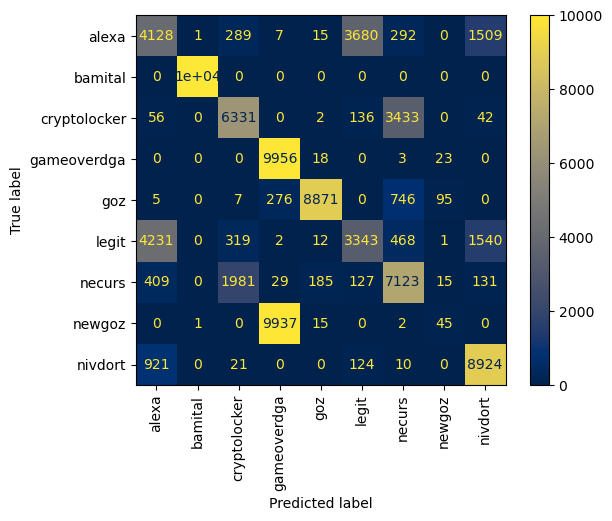

In [249]:
multi_label_confusion(test_predictions,test_labels)

In [250]:
test_transform_metrics = classification_report(test_labels,test_predictions,target_names=categories)
print(test_transform_metrics)

              precision    recall  f1-score   support

       alexa       0.42      0.42      0.42      9921
     bamital       1.00      1.00      1.00     10000
cryptolocker       0.71      0.63      0.67     10000
 gameoverdga       0.49      1.00      0.66     10000
         goz       0.97      0.89      0.93     10000
       legit       0.45      0.34      0.39      9916
      necurs       0.59      0.71      0.65     10000
      newgoz       0.25      0.00      0.01     10000
     nivdort       0.73      0.89      0.81     10000

    accuracy                           0.65     89837
   macro avg       0.62      0.65      0.61     89837
weighted avg       0.63      0.65      0.61     89837

